**NaiveBayse and Knn Supervised Algorithms**

In [59]:
# Importing libraries and loading dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x_train=pd.read_csv("/content/train.csv")

y_test=pd.read_csv("/content/gender_submission.csv")
x_test=pd.read_csv("/content/test.csv")

print("Successfully imported libraries and loaded dataset")

Successfully imported libraries and loaded dataset


**Data Manipulation**

In [60]:
# Data manipulation

#Cols with missing values
cols_with_missing=[col for col in x_train.columns if x_train[col].isnull().any()]

# filling the missing values by its mean

my_list=x_train["Age"]
x=0
mean_age=round(x_train["Age"].mean(),2)
for num in my_list.isnull():
    if num==True:
      my_list[x]=mean_age
    x+=1
x_train=x_train.drop(["Cabin"],axis=1)

# Dropping rows in which "Embarked" has nan value
x=0
lis=[]
my_list=x_train["Embarked"]
for i in my_list.isnull():
  if i ==True:
    lis.append(x)
  x+=1
for i in lis:
  x_train=x_train.drop(index=i,axis=1)

# for test data
mean_age=round(x_test["Age"].mean(),2)
my_list=x_test["Age"]
x=0
for num in my_list.isnull():
    if num==True:
      my_list[x]=mean_age
    x+=1
x_test=x_test.drop(["Cabin"],axis=1)

# Dropping rows in which "Embarked" has nan value
x=0
lis=[]
my_list=x_test["Embarked"]
for i in my_list.isnull():
  if i ==True:
    lis.append(x)
  x+=1

for i in lis:
  x_test=x_test.drop(index=i,axis=1)
y_train=x_train["Survived"]
x_train=x_train.drop(["Survived"],axis=1)

print("Finished Data manipulation")

Finished Data manipulation


<ipython-input-60-44cb137b1f47>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[x]=mean_age
<ipython-input-60-44cb137b1f47>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[x]=mean_age


**Plotting graphs for data visualization**

Text(0, 0.5, 'Age')

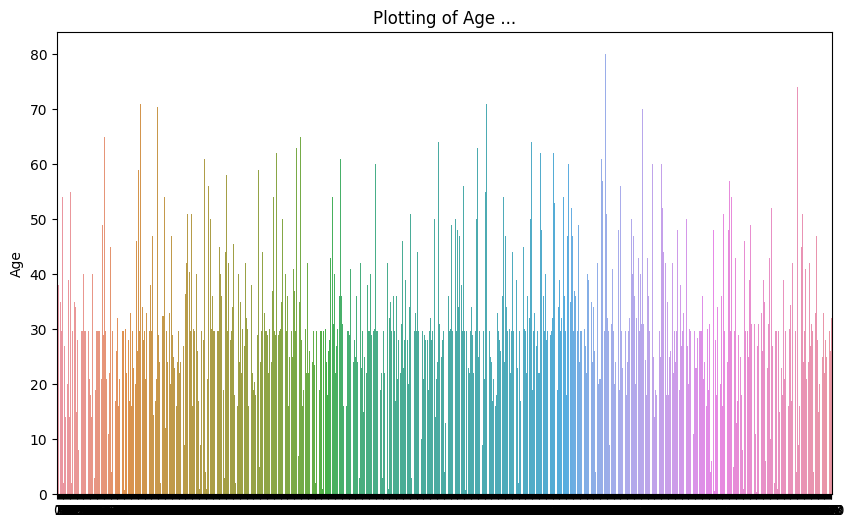

In [61]:
plt.figure(figsize=(10,6))
# Add title
plt.title("Plotting of Age ...")
# Bar chart 
sns.barplot(x=x_train.index,y=x_train["Age"])
# Add label for vertical axis
plt.ylabel("Age")


<Axes: >

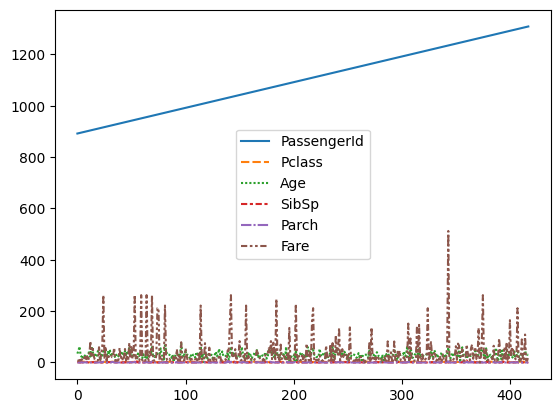

In [62]:
# Line chart for x_test.

sns.lineplot(data=x_test)

In [63]:
# Selecting numerical columns from the data

import numpy as np
num_cols=[cname for cname in x_train.columns if x_train[cname].dtype in ["int64","float64"]]
x_train=x_train[num_cols]
num_cols=[cname for cname in x_test.columns if x_test[cname].dtype in ["int64","float64"]]
x_test=x_test[num_cols]
print(x_train.head(5))
print(x_test.head(5))

   PassengerId  Pclass   Age  SibSp  Parch     Fare
0            1       3  22.0      1      0   7.2500
1            2       1  38.0      1      0  71.2833
2            3       3  26.0      0      0   7.9250
3            4       1  35.0      1      0  53.1000
4            5       3  35.0      0      0   8.0500
   PassengerId  Pclass   Age  SibSp  Parch     Fare
0          892       3  34.5      0      0   7.8292
1          893       3  47.0      1      0   7.0000
2          894       2  62.0      0      0   9.6875
3          895       3  27.0      0      0   8.6625
4          896       3  22.0      1      1  12.2875


**NaiveBayse Model**

In [64]:
# Creating NaiveBayse Model

class NaiveBayse:
  def fit(self,x,y):
    n_sam,n_fea=x.shape
    self._classes=np.unique(y)
    n_classes=len(self._classes)

    # Calculate mean, var and prior for each classes
    self._mean=np.zeros((n_sam,n_fea),dtype=np.float64)
    self._var=np.zeros((n_sam,n_fea),dtype=np.float64)
    self._priors=np.zeros((n_sam),dtype=np.float64)

    for idx,c in enumerate(self._classes):
      x_c=x[y==c]
      self._mean[idx,:]=x_c.mean(axis=0)
      self._var[idx,:]=x_c.var(axis=0)
      self._priors[idx]=x_c.shape[0]/float(n_sam)
    
      # creating functon for prediction

  def predict(self,x):
    y_pred=[self.predict_for_each(i) for i in np.array(x)]
    return np.array(y_pred)
  def predict_for_each(self,x):
    posteriors_list=[]
    # Calculate posterior probability for each class
    for idx,c in enumerate(self._classes):
      prior=np.log(self._priors[idx])
      posterior=np.sum(np.log(self.probability_distributed_function(idx,x))) #pdf- probability distibuted function
      posterior=posterior + prior
      posteriors_list.append(posterior)

      # return class with highest posterior
    return self._classes[np.argmax(posteriors_list)]



  def probability_distributed_function(self,class_idx,x):
    mean=self._mean[class_idx]
    var=self._var[class_idx]
    num=np.exp(-((x - mean)**2)/(2*var))
    den=np.sqrt(2*np.pi*var)
    return num/den

print("Successfully created the Model")


Successfully created the Model


In [65]:
# Predict the output
nb=NaiveBayse()
nb.fit(x_train,y_train)
prediction=nb.predict(x_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0]


In [66]:
# Calculating the accuracy of our model

a=0
for i in range(len(y_test)):
  if np.array(y_test)[i][1]==prediction[i]:
    a+=1
print("Accuracy of NaiveBayse model =",str(round((a/len(prediction))*100))+" %")

Accuracy of NaiveBayse model = 61 %


**K-Nearest Neighbours**

In [67]:
# K-Nearest Neighbours

# importing libraries
import numpy as np
from collections import Counter
print("Successfully imported all libraries")

Successfully imported all libraries


In [68]:
# Creating Knn model

def euclidean_dist(x1,x2):
  d=np.sqrt(np.sum((x1-x2)**2))
  return d

class Knn:
  def __init__(self,k):
    self.k=k

  def fit(self,x_train,y_train):
    self.X_train=x_train
    self.y_train=y_train

  def predict(self,x_test):
    predictions=[self.prediction_for_each(i) for i in np.array(x_test)]
    return predictions

  def prediction_for_each(self,x):
    # Compute the distance
    distance=[euclidean_dist(x,i) for i in np.array(self.X_train)]
    # Get closest k
    k_indices=np.argsort(distance)[:self.k]
    k_nearest_lable=[self.y_train[i] for i in k_indices]

    most_common=Counter(k_nearest_lable).most_common()
    return most_common[0][0]
print("Successfully created the model")


Successfully created the model


In [69]:
# Fitting training data into the Model and predicting the output
knn=Knn(k=5)
knn.fit(x_train,y_train)
prediction2=knn.predict(x_test)
print(prediction2)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [70]:
# Calculating the accuracy of Knn Model
a=0
for i in range(len(y_test)):
  if np.array(y_test)[i][1]==prediction2[i]:
    a+=1
print("Accuracy of KNN model =",str(round((a/len(prediction2))*100))+" %")

Accuracy of KNN model = 64 %


**The End**